In [1]:
from gensim import corpora
from parameters import *
from NLP_preprocessing import *
from LDA_model import *

import warnings
warnings.filterwarnings('ignore')


#read dataset, only keep desired text column and rename it
data = read_data(in_dir = IN_DIR, filename = FILENAME, text_col = TEXT_COL , 
                 renamed_text_col = RENAMED_TEXT_COL, text_language = LANGUAGE)
cleaned_text = process_text_col(data, text_col = RENAMED_TEXT_COL)  # processed Text Data

# Create Dictionary
id2word = corpora.Dictionary(cleaned_text)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in cleaned_text]

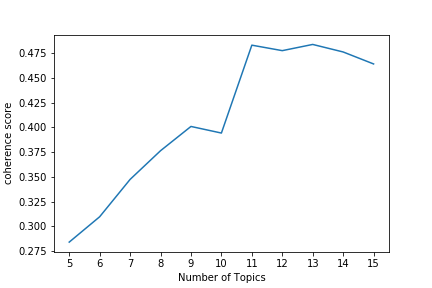

In [2]:
# coherence_vs_topics(texts= cleaned_text,corpus = corpus, dictionary = id2word ,min_number_topics = 5, max_number_topics = 15 )

from IPython.display import Image
Image('out/coherence_Topics_plot.png')

In [3]:
#NUM_TOPICS = 9 
lda_model = lda(num_topics = NUM_TOPICS, corpus = corpus , dictionary = id2word)

In [4]:
pd.set_option('display.max_colwidth', 100)
df_dominant_topic = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=cleaned_text)
df_dominant_topic.head()

,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,8.0,0.5930,"go, just, page, log, work, give, option, way, assessment, link","[find, get, assessment, log, blank, page, print, print, page, blank, just]"
1,5.0,0.5192,"mail, site, tax, time, year, status, reassessment, use, form, much","[dissatisfied, time, table, reassessment, tax]"
2,5.0,0.3552,"mail, site, tax, time, year, status, reassessment, use, form, much","[site, user_friendly, specially, people, accustom, use, computer]"
3,5.0,0.3765,"mail, site, tax, time, year, status, reassessment, use, form, much","[site, feel, hidden]"
4,4.0,0.3915,"information, access, instalment, view, navigate, dispute, week, phone, easy, explain","[access, wife, representative, live, easy, reach, phone, expensive]"


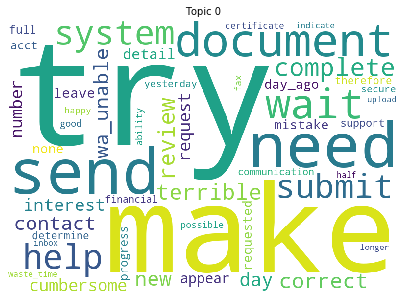

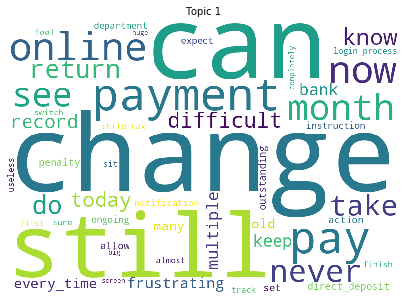

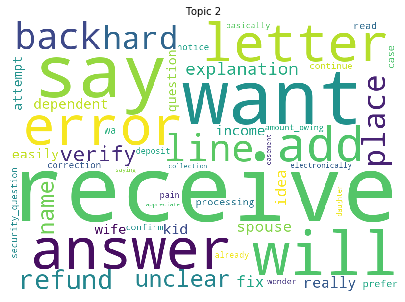

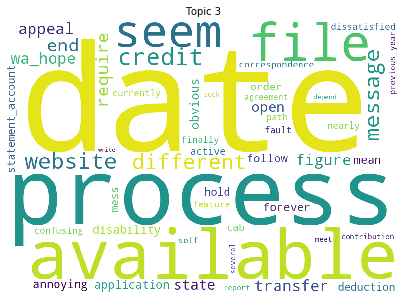

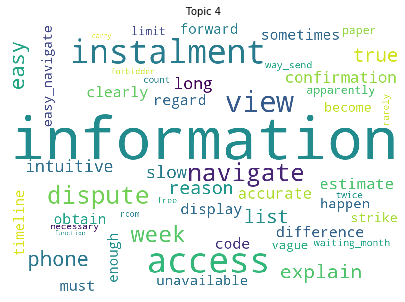

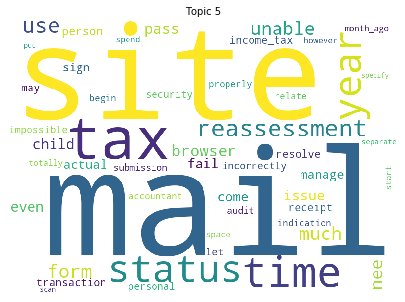

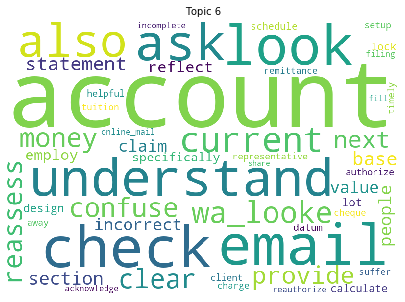

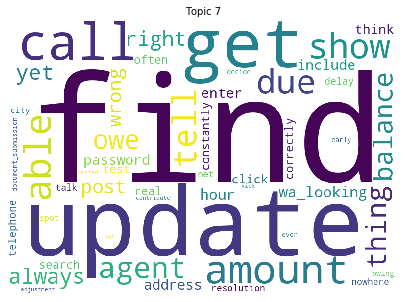

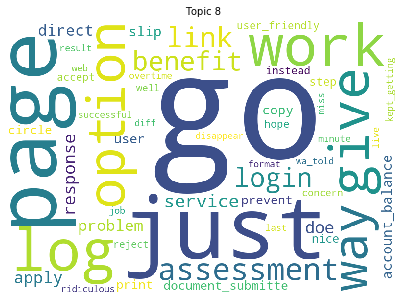

In [5]:
#Wordcloud 
get_wordcloud_LDA(ldamodel = lda_model, num_topics = NUM_TOPICS)

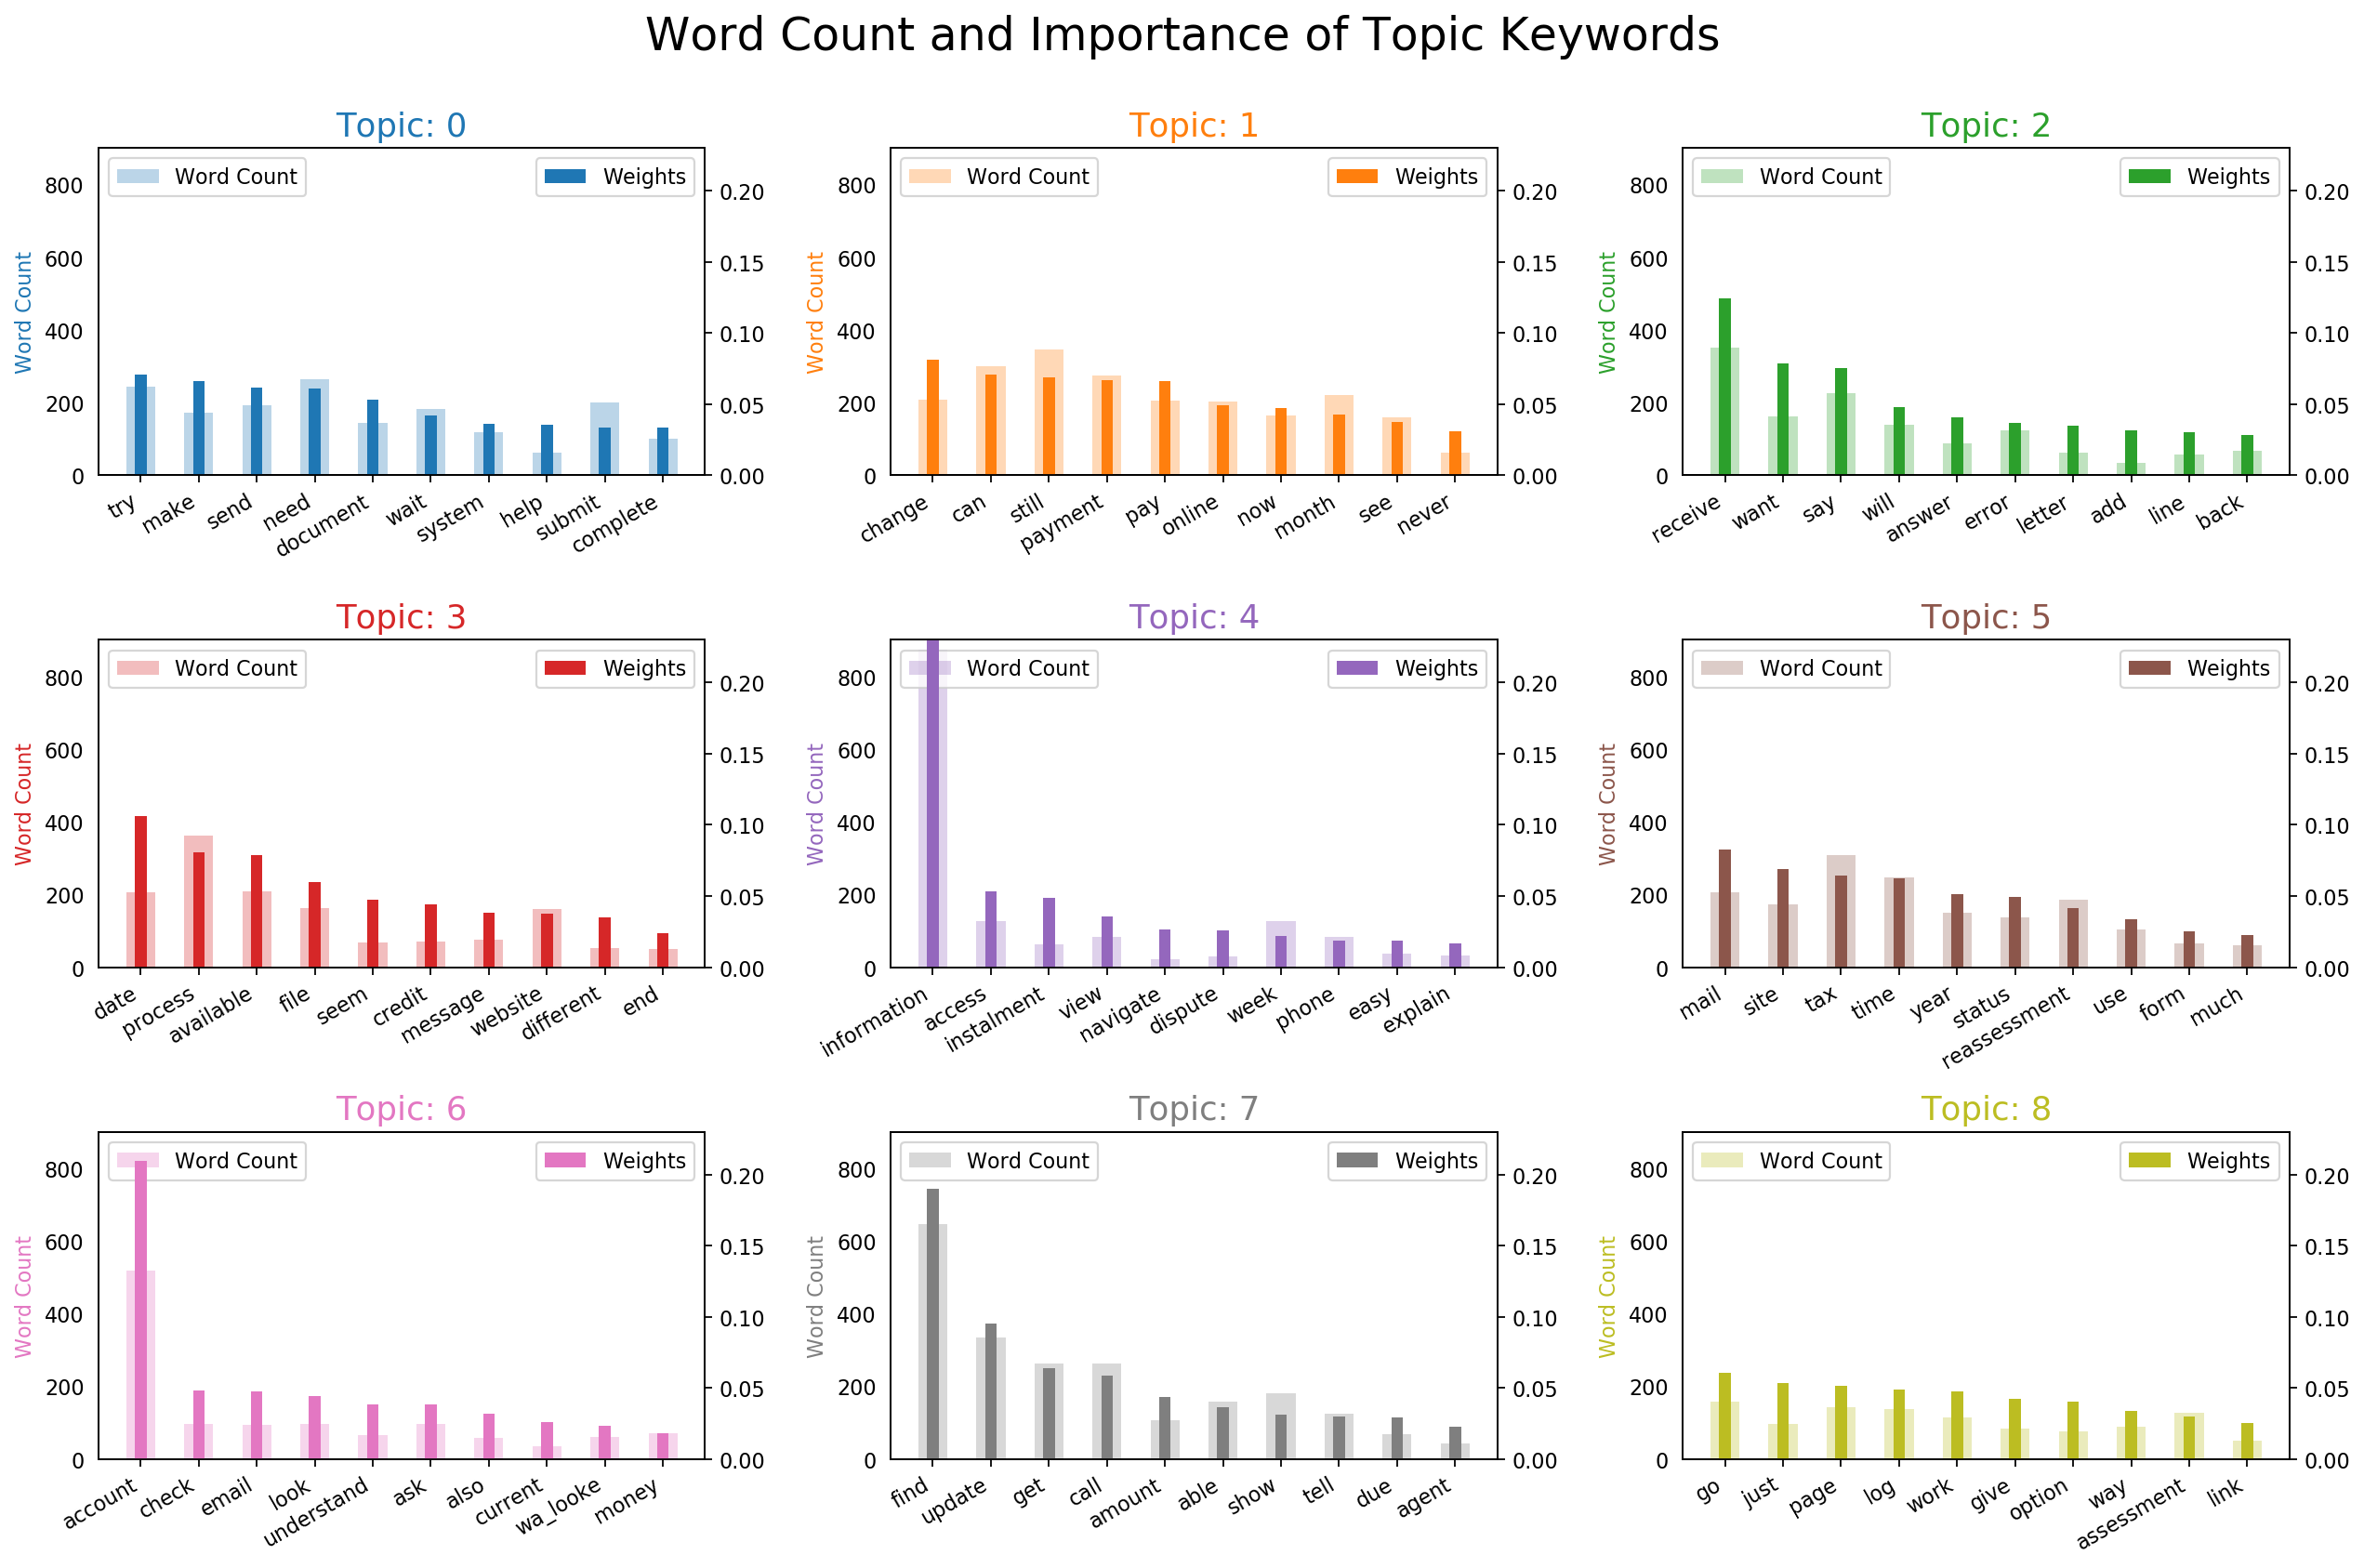

In [6]:
word_count_topic(ldamodel = lda_model, num_topics = NUM_TOPICS , texts = cleaned_text)

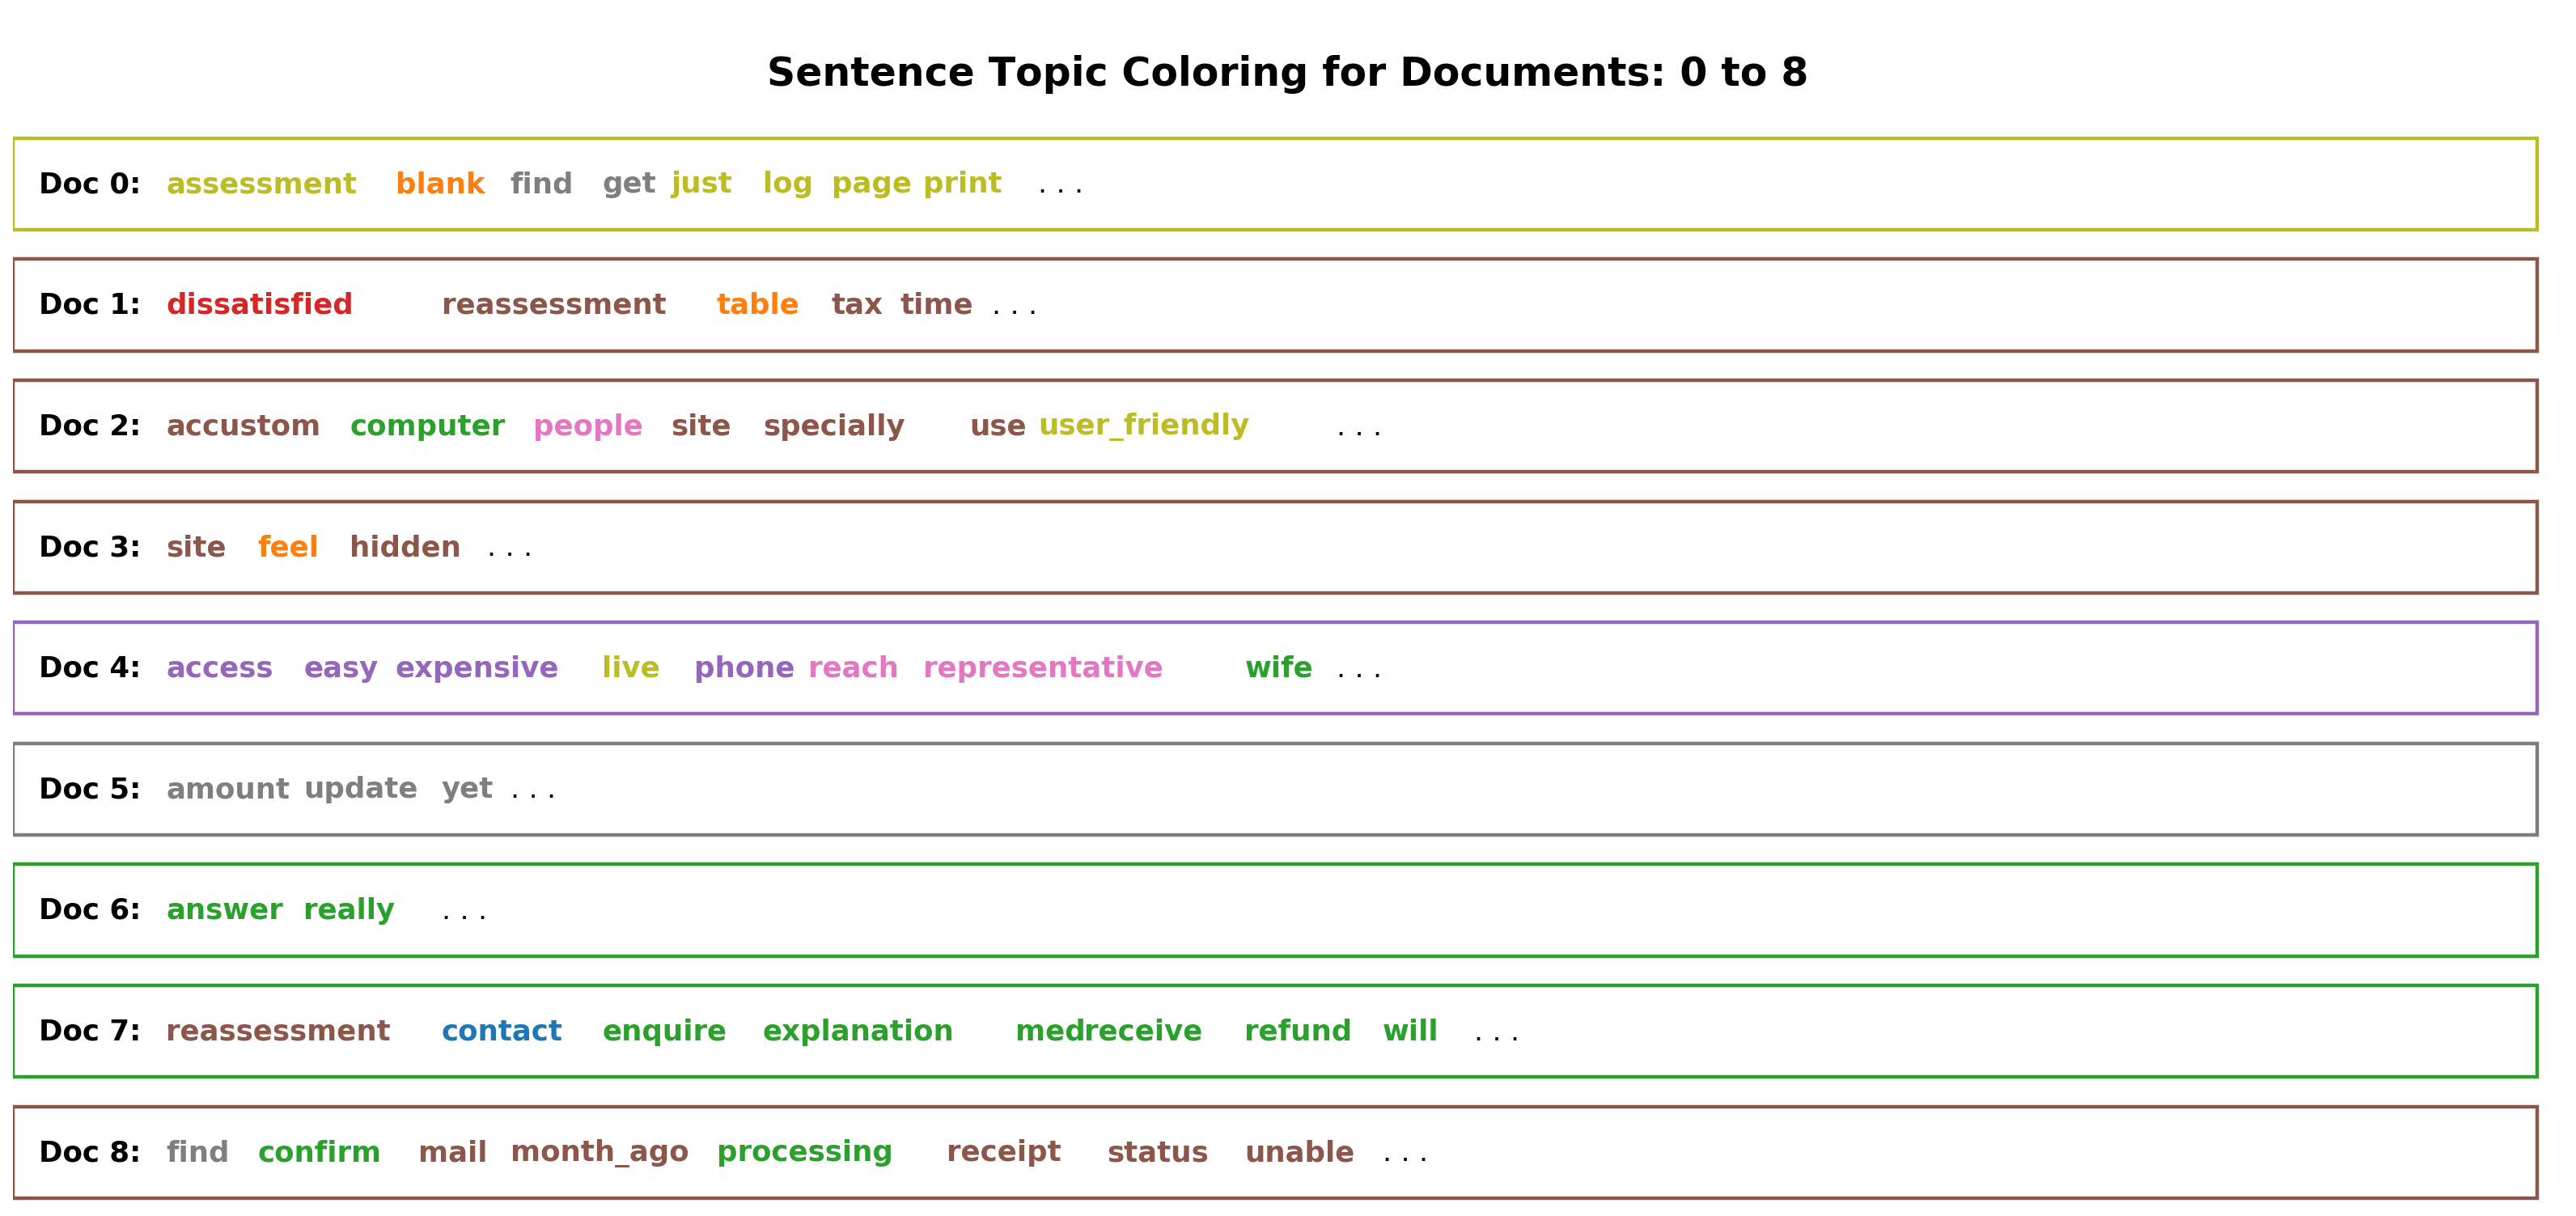

In [7]:
sentences_chart(ldamodel=lda_model, corpus=corpus, start = 0, end = 10)    

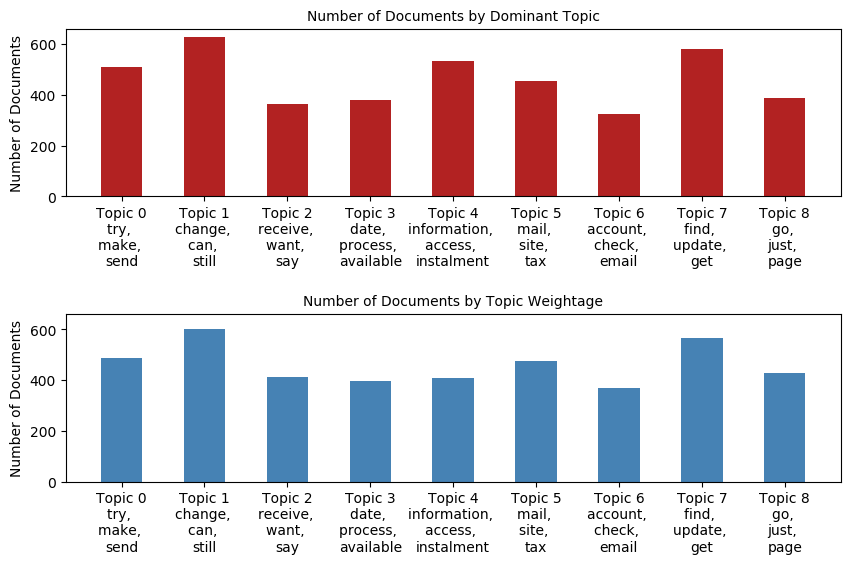

In [8]:
Plot_topic_dist(ldamodel= lda_model, num_topics = NUM_TOPICS, corpus = corpus)

In [9]:
tsne_plot(ldamodel = lda_model, corpus = corpus,num_topics = NUM_TOPICS , Keep_well_separated_pcnt = 0.2)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3967 samples in 0.020s...
[t-SNE] Computed neighbors for 3967 samples in 0.584s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3967
[t-SNE] Computed conditional probabilities for sample 2000 / 3967
[t-SNE] Computed conditional probabilities for sample 3000 / 3967
[t-SNE] Computed conditional probabilities for sample 3967 / 3967
[t-SNE] Mean sigma: 0.097737
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.304901
[t-SNE] KL divergence after 1000 iterations: 1.559829


Loading BokehJS ...

In [10]:
pyldavis_plot(ldamodel = lda_model ,corpus = corpus,  mds = "tsne")

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
1      111.092506 -133.722946       1        1  15.332765
7       34.946613  107.064590       2        1  13.009207
5      -28.088213 -159.949036       3        1  12.094359
0      147.698074   21.369604       4        1  11.902631
8      -97.501183  126.981384       5        1  10.878271
2       30.312096  -32.794945       6        1  10.034494
3     -155.443665 -118.494690       7        1   9.007297
4     -204.248108   22.596130       8        1   8.909684
6      -79.404678   -6.864717       9        1   8.831294, topic_info=                Term        Freq       Total Category  logprob  loglift
67       information  793.000000  793.000000  Default  30.0000  30.0000
2               find  697.000000  697.000000  Default  29.0000  29.0000
134          account  521.000000  521.000000  Default  28.0000  28.0000
39           receive  352.000000  352.000000  Default  27.0000  27.0000
31            update  350.000000  350.000000  Default  26.0000  26.0000
...              ...         ...         ...      ...      ...      ...
729     specifically   21.265860   22.725513   Topic9  -4.7615   2.3605
28    representative   12.356153   13.252921   Topic9  -5.3045   2.3568
382          helpful   12.030871   12.963841   Topic9  -5.3312   2.3522
2454          employ   21.354879   23.246128   Topic9  -4.7574   2.3420
780            value   27.692108   30.814690   Topic9  -4.4975   2.3200

[311 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
226       2  0.996860             able
22        8  0.992705           access
134       9  0.997341          account
221       5  0.965908  account_balance
275       8  0.966510         accurate
...     ...       ...              ...
41        6  0.989944             will
73        5  0.993139             work
586       2  0.978622            wrong
150       3  0.997009             year
32        2  0.981174              yet

[286 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 8, 6, 1, 9, 3, 4, 5, 7])